##  Suport Vector Machine (SVM)
#   ¿Qué aprenderemos hoy?
-   SVM kernel lineal
-   SVM kernel no linea
##  Support Vector Machine
Con SVM nuestro objetivo de optimización es maximizar el margen. El margen lo podemos definir como la distancia entre el hiperplano de separación (frontera de decisión) y las muestras de entrenamiento más cercanas a este
hiperplano, que son los llamados Vectores de Soporte.


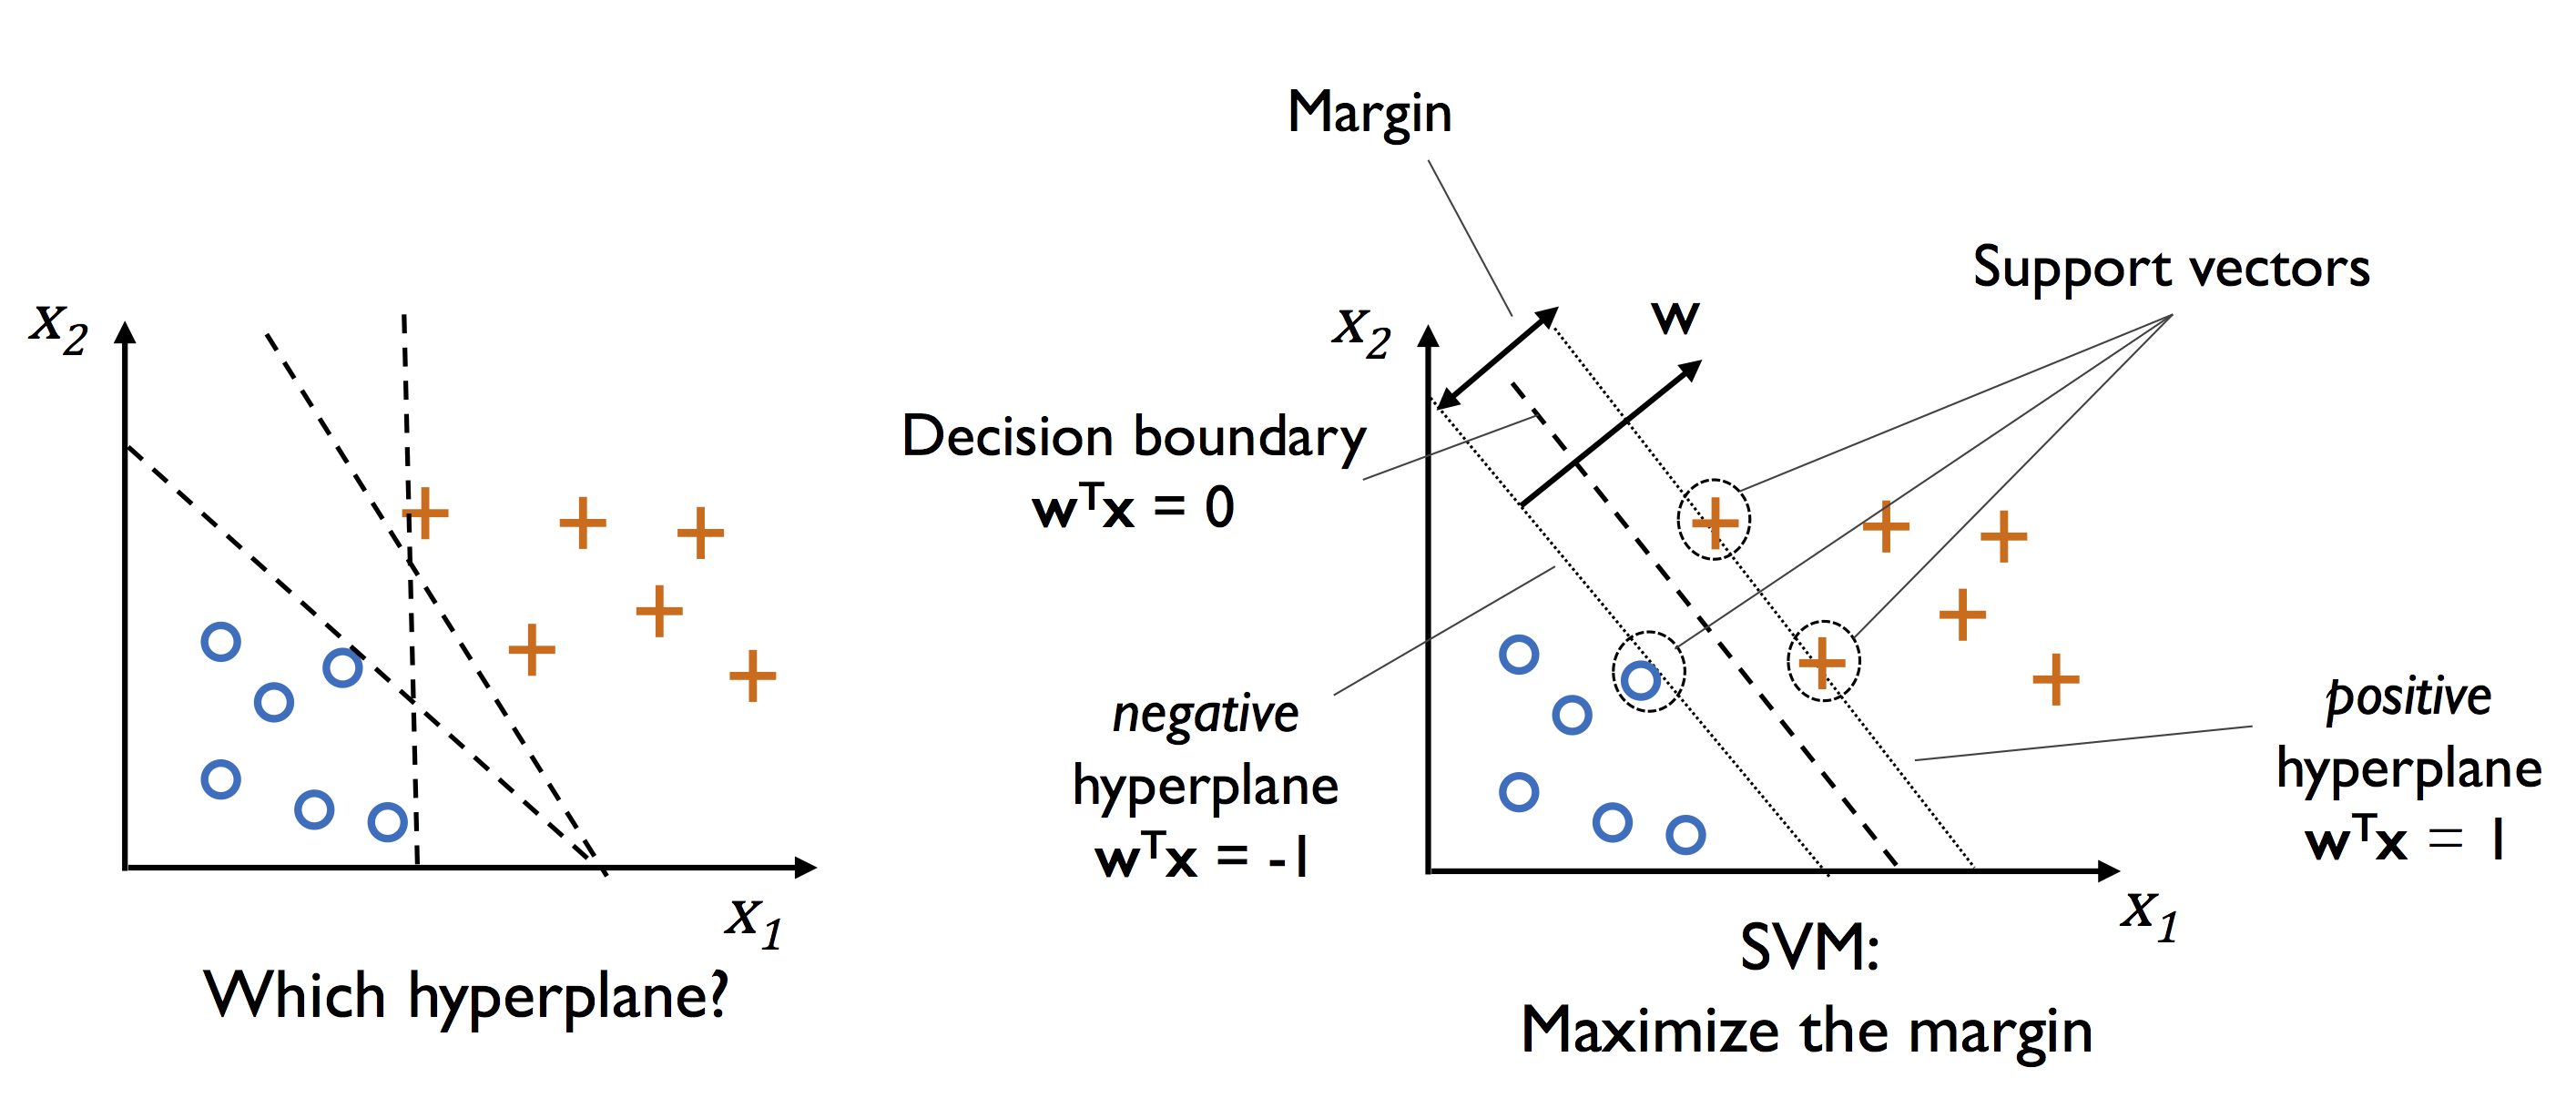

In [3]:
from IPython.display import Image
Image(filename=r'Imagenes_Clase_05/5_3.png', width=700)


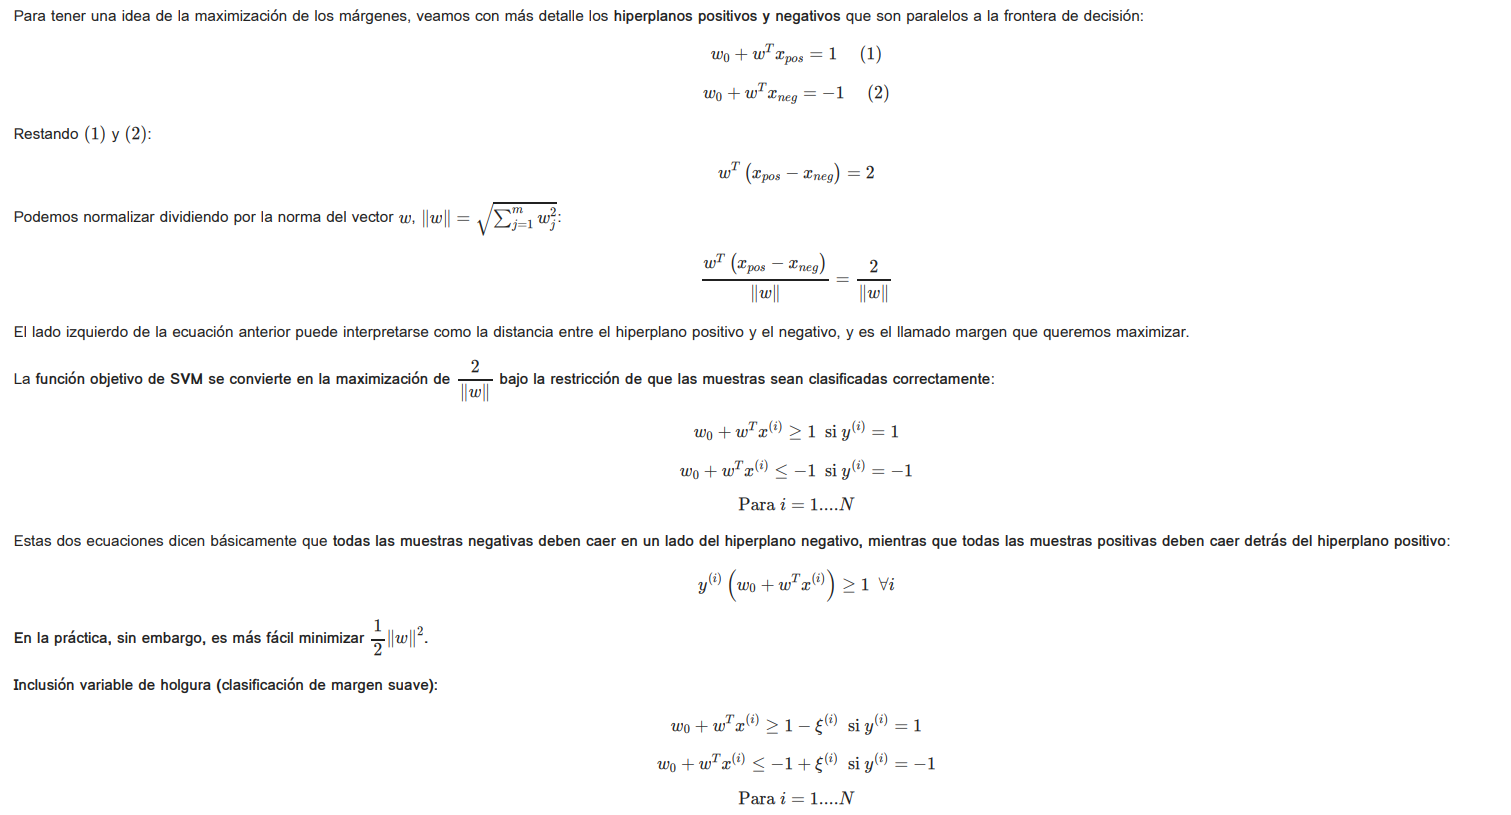
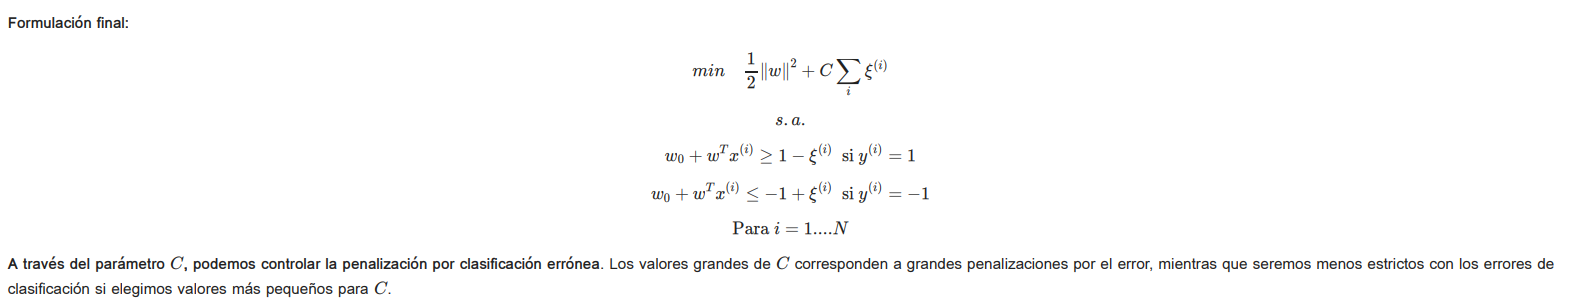

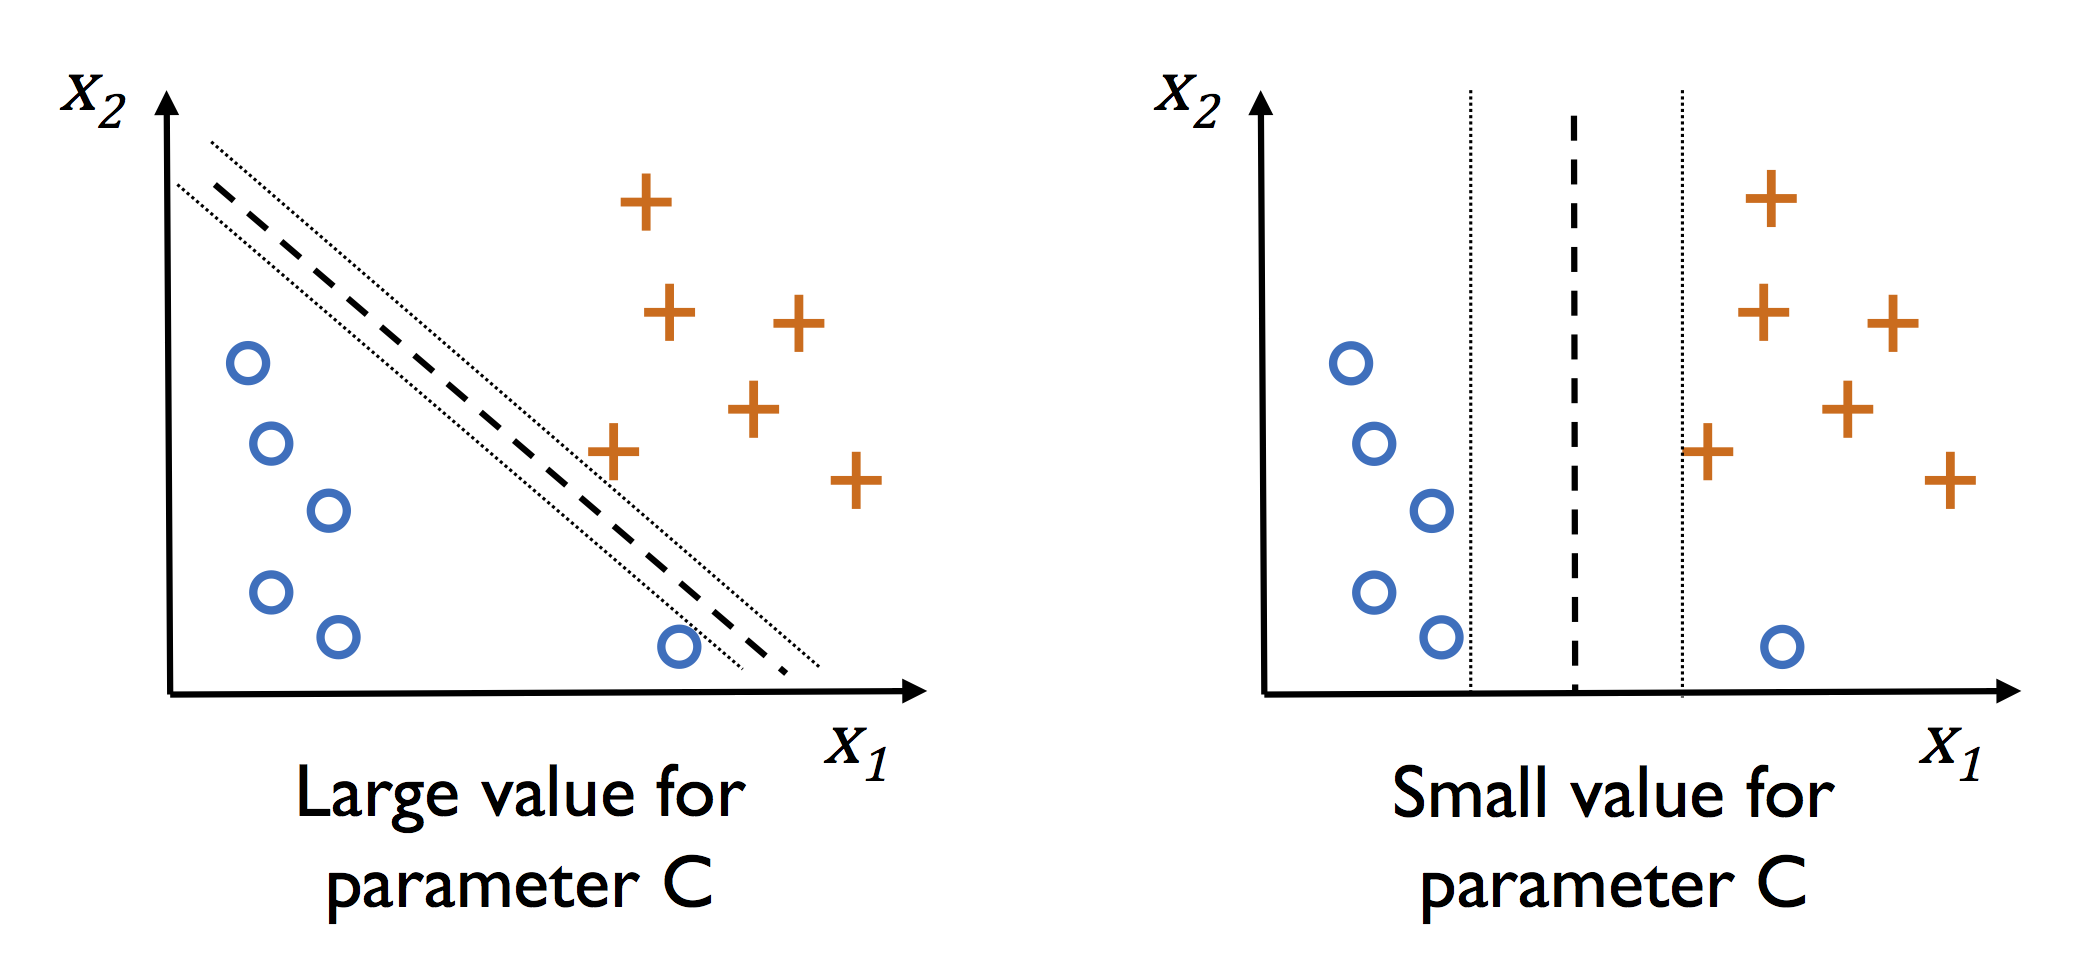

In [4]:
Image(filename=r'Imagenes_Clase_05/5_4.png', width=600)


In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
name_columns = ['sepal_length','sepal_width','petal_length','petal_width']
variable_names=list(name_columns[2:4])
print(variable_names)
y = iris.target
name_clases=np.unique(y)
print('Etiquetas de Clase:', name_clases)

['petal_length', 'petal_width']
Etiquetas de Clase: [0 1 2]


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1, stratify=y)
print('Cantidad de etiquetas en y:', np.bincount(y))
print('Cantidad de etiquetas en y_train:', np.bincount(y_train))
print('Cantidad de etiquetas en y_test:', np.bincount(y_test))


Cantidad de etiquetas en y: [50 50 50]
Cantidad de etiquetas en y_train: [35 35 35]
Cantidad de etiquetas en y_test: [15 15 15]


In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


In [9]:
%matplotlib inline
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X, y, classifier, plot_object,test_idx=None,
only_train=False, only_test=False,
clases_names=['clase 0','clase 1'],
resolution=0.02):
    markers = ('s', 'o', '^', 'v', 'x')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
 
 
    plot_object.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
 
    if not(only_test):
        for idx, cl in enumerate(np.unique(y)):
            plot_object.scatter(x=X[y == cl, 0],y=X[y == cl, 1],
                                alpha=0.8,c=colors[idx],
                                marker=markers[idx],label=clases_names[idx],
                                edgecolor='black')
    if not(test_idx is None) and not(only_train):
        X_test, y_test = X[test_idx, :], y[test_idx]
        for idx, cl in enumerate(np.unique(y_test)):
            plot_object.scatter(x=X_test[y_test == cl, 0],
                                y=X_test[y_test == cl, 1],
                                alpha=0.8,c=colors[idx],marker=markers[idx],
                                label=clases_names[idx],edgecolor='black')

In [10]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))


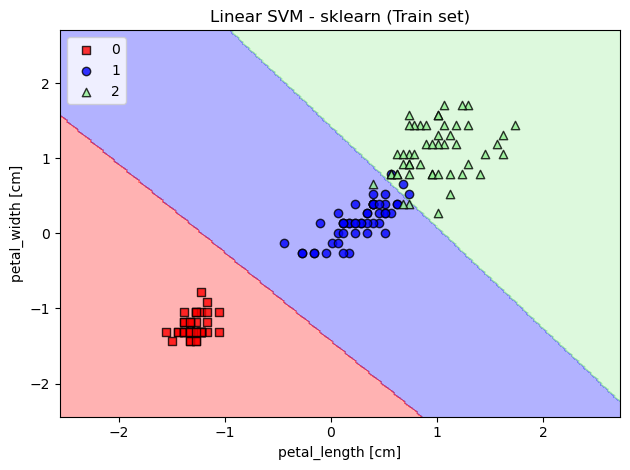

In [11]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=100., random_state=1,probability=True)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined,classifier=svm,
                      plot_object=plt, test_idx=range(105, 150),
                      only_train=True,clases_names=name_clases)
plt.xlabel(f'{variable_names[0]} [cm]')
plt.ylabel(f'{variable_names[1]} [cm]')
plt.title('Linear SVM - sklearn (Train set)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

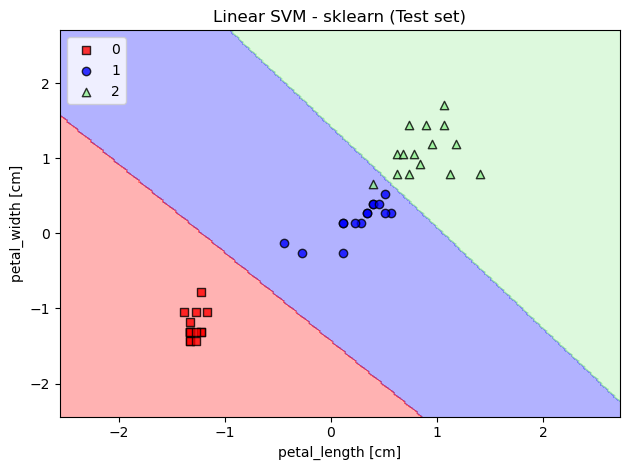

In [12]:
plot_decision_regions(X_combined_std, y_combined,classifier=svm,
                      plot_object=plt,test_idx=range(105, 150),
                      only_test=True,clases_names=name_clases)
plt.xlabel(f'{variable_names[0]} [cm]')
plt.ylabel(f'{variable_names[1]} [cm]')
plt.title('Linear SVM - sklearn (Test set)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [13]:
svm.coef_


array([[-1.37885596, -1.1731575 ],
       [-0.68216416, -0.56900015],
       [-6.82853791, -5.08364077]])

In [14]:
print(y_combined[0:3])
print(svm.predict(X_combined_std[0:3]))
svm.predict_proba(X_combined_std[0:3])

[0 0 2]
[0 0 2]


array([[0.96258031, 0.02505306, 0.01236663],
       [0.94451966, 0.03933839, 0.01614195],
       [0.00848338, 0.01744795, 0.97406868]])

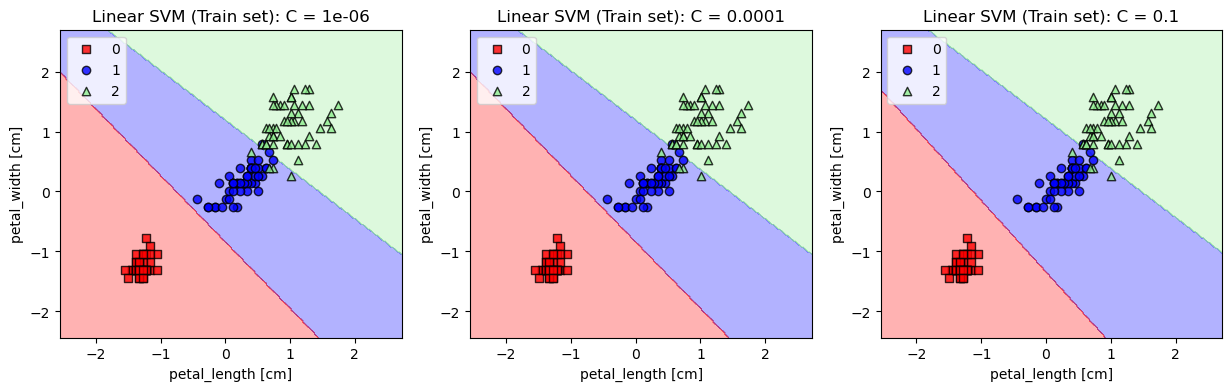

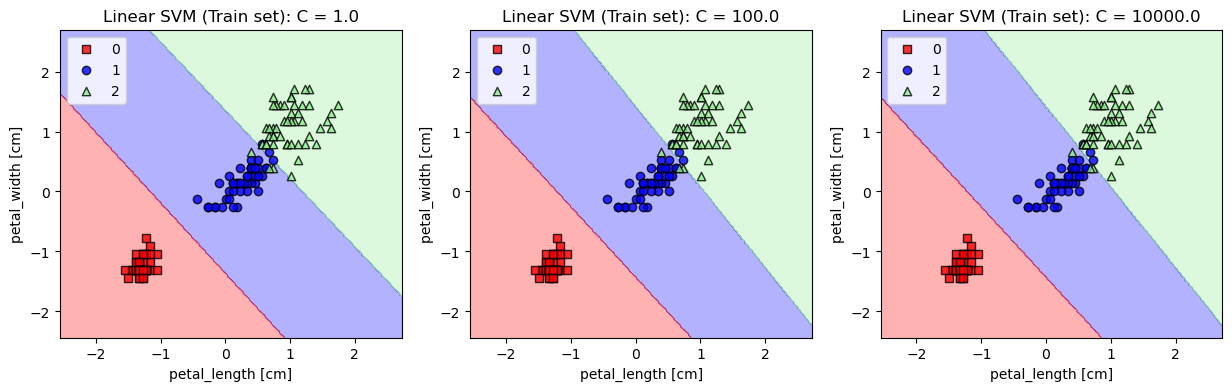

In [15]:
r_exponentes=[-6,-4,-1,0,2,4]
for idx, c in enumerate(r_exponentes):
    svm = SVC(kernel='linear', C=10.**c, random_state=1)
    svm.fit(X_train_std, y_train)
    if idx%3==0:
        fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
    plot_decision_regions(X_combined_std, y_combined,classifier=svm,
                          plot_object=axs[idx%3],test_idx=range(105, 150),
                          only_train=True,clases_names=name_clases)
    axs[idx%3].set_xlabel(f'{variable_names[0]} [cm]')
    axs[idx%3].set_ylabel(f'{variable_names[1]} [cm]')
    axs[idx%3].set_title('Linear SVM (Train set): C = '+str(10.**c))
    axs[idx%3].legend(loc='upper left')
    if idx%3==2:
        plt.show()

##  SVM Kernel No Lineal
- Para abordar problemas de clasificación no linea

In [16]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)
name_clases_xor=np.unique(y_xor)
print('Etiquetas de Clase:', name_clases_xor)


Etiquetas de Clase: [-1  1]


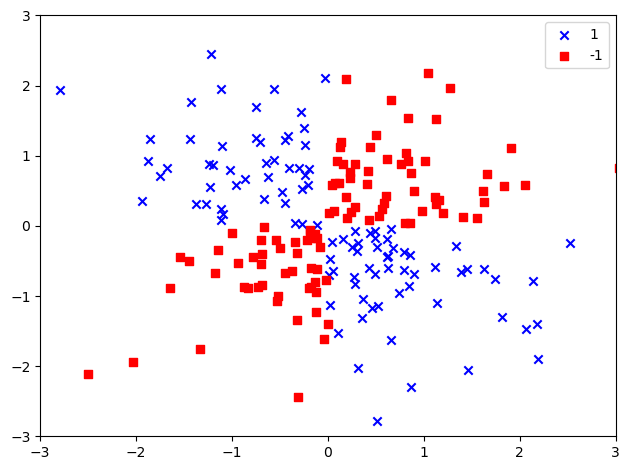

In [17]:
plt.scatter(X_xor[y_xor == 1, 0],X_xor[y_xor == 1, 1],c='b',marker='x',label='1')
plt.scatter(X_xor[y_xor == -1, 0],X_xor[y_xor == -1, 1],c='r',marker='s',label='-1')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()


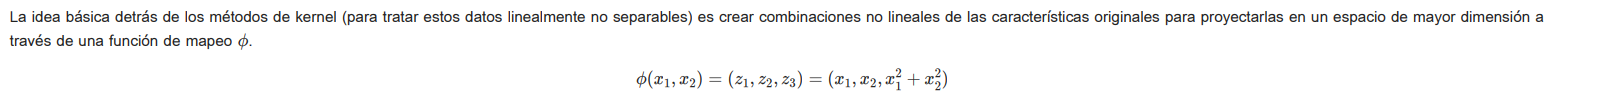

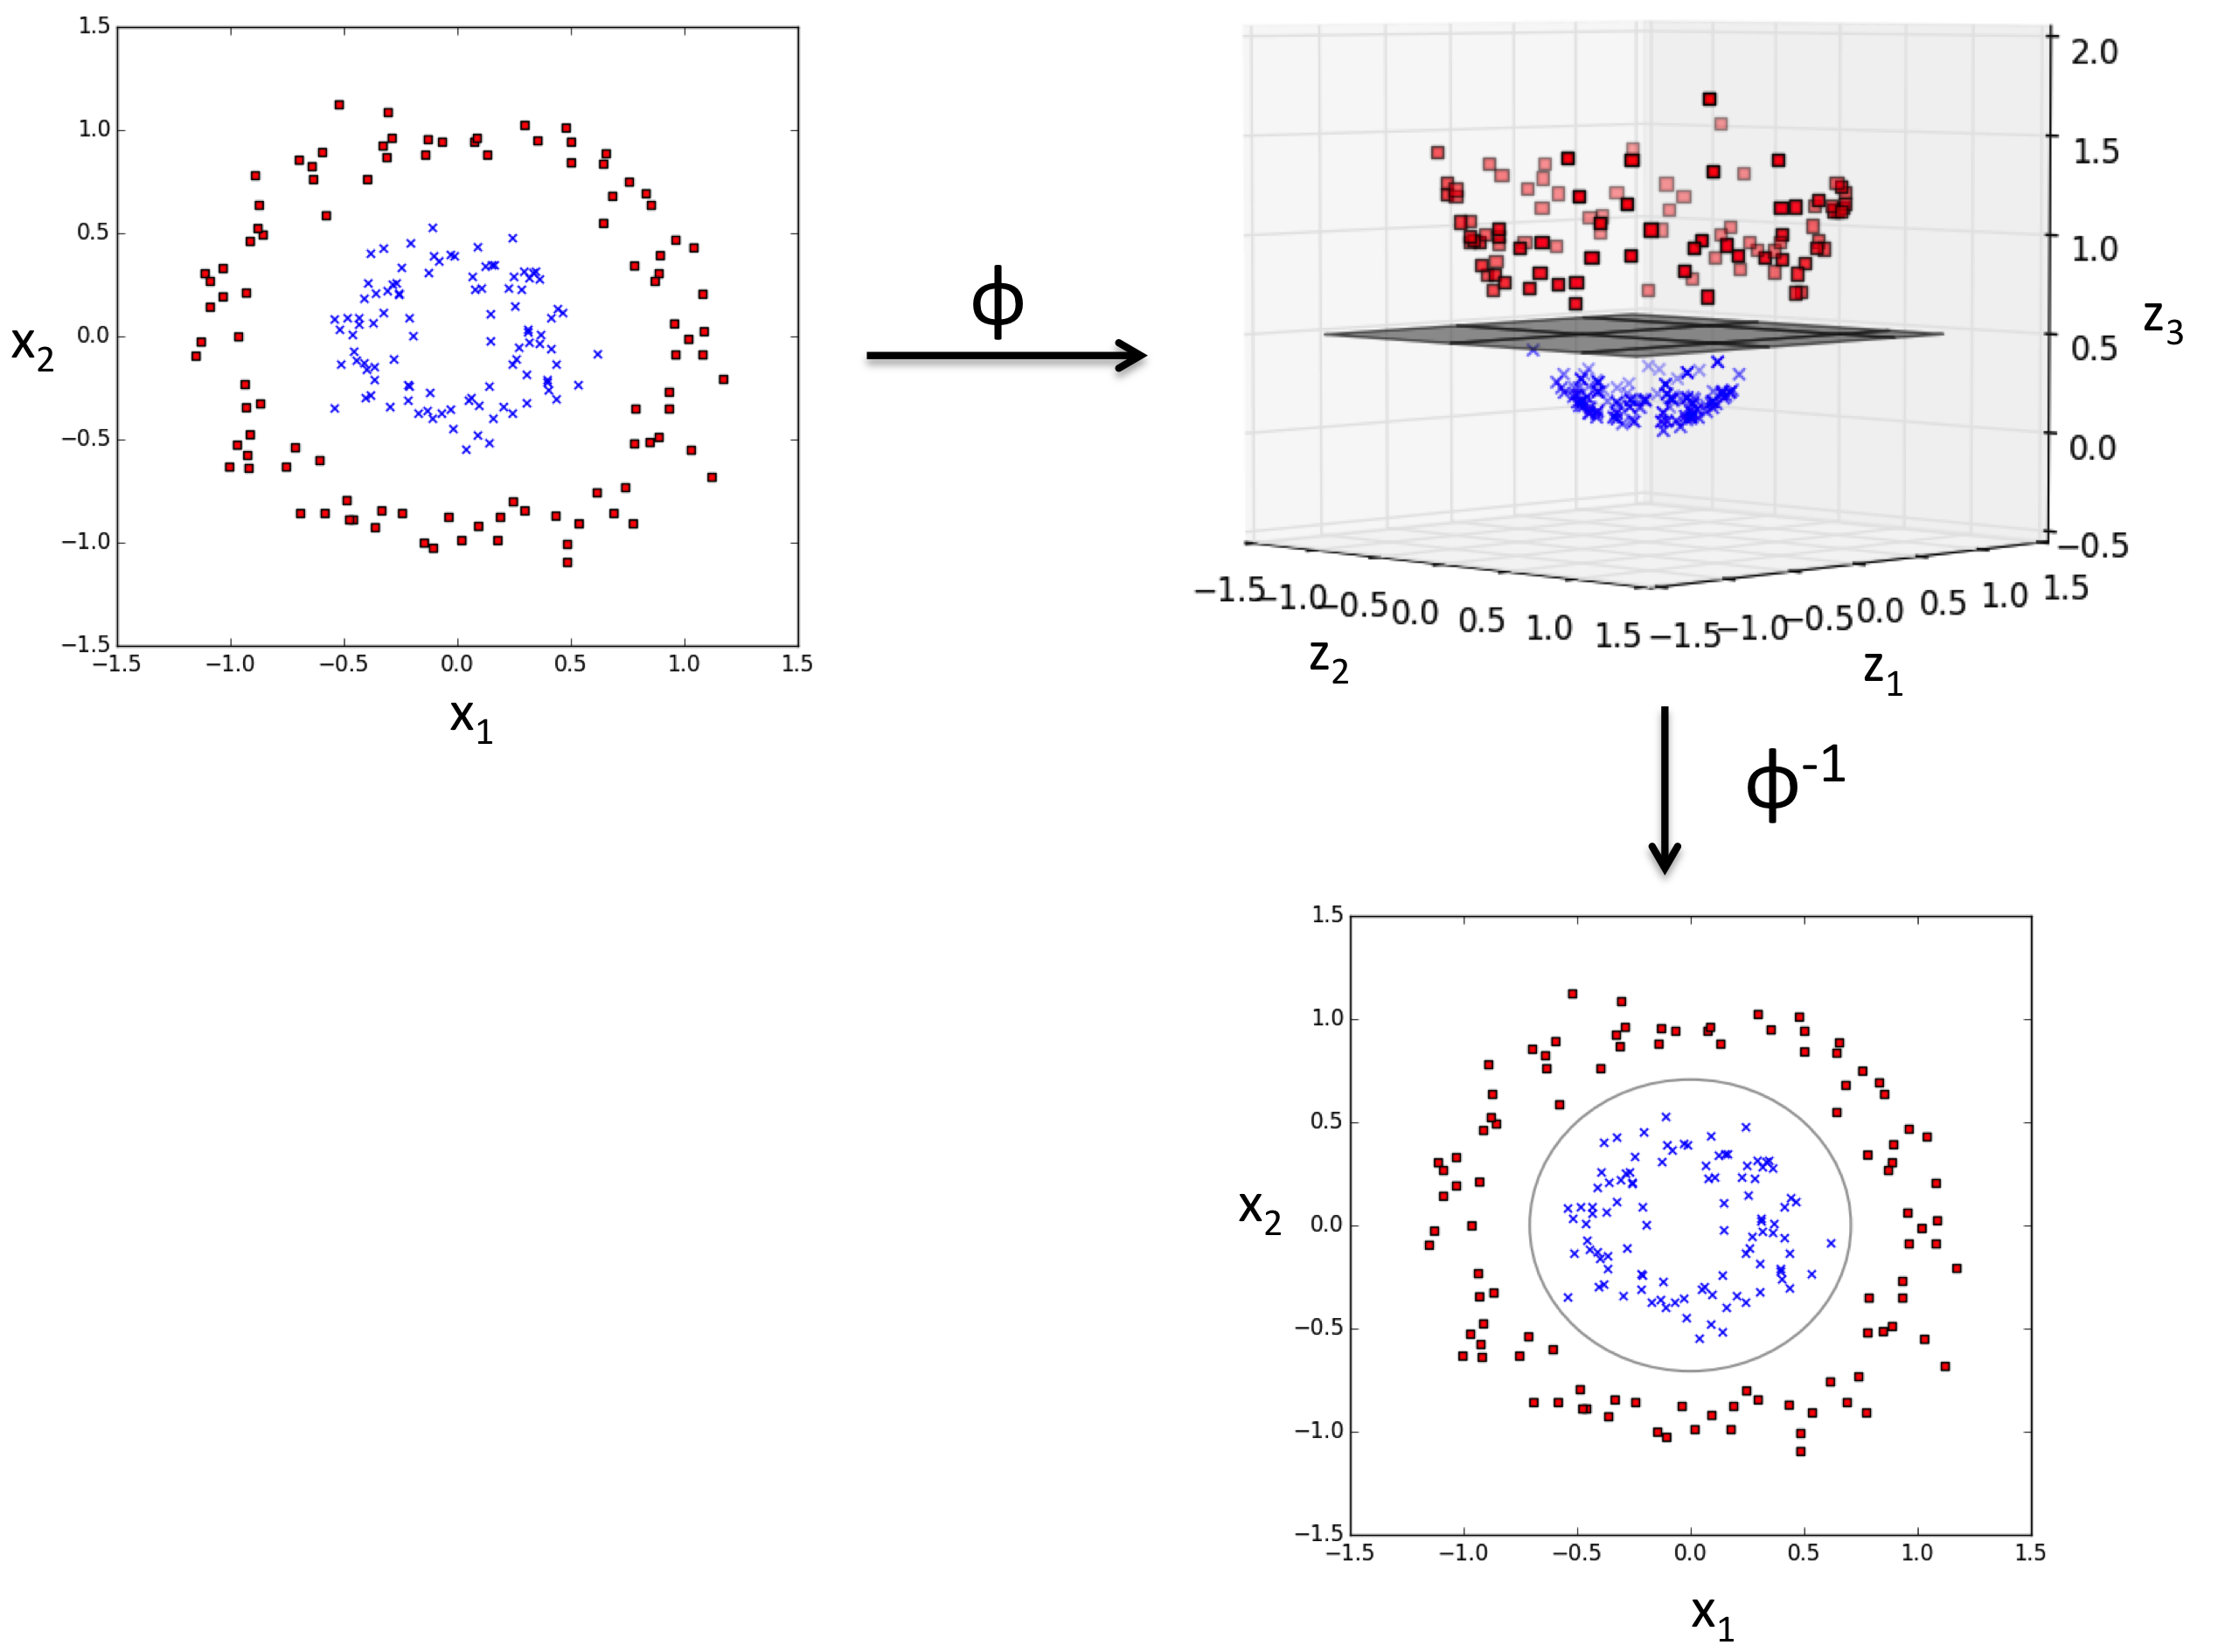

In [18]:
from IPython.display import Image
Image(filename=r'Imagenes_Clase_05/6_1.png', width=700)


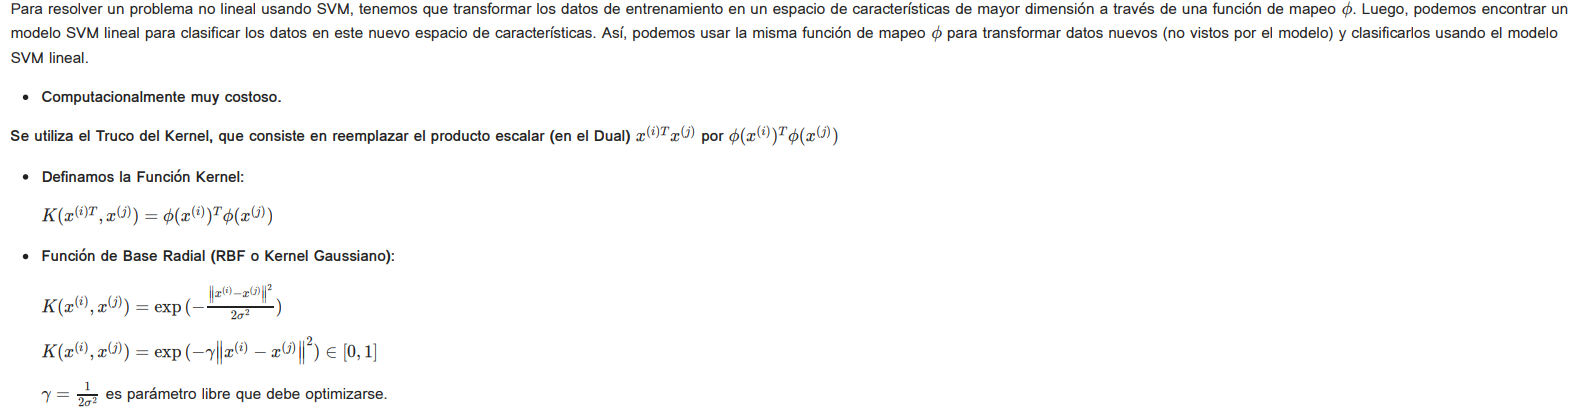

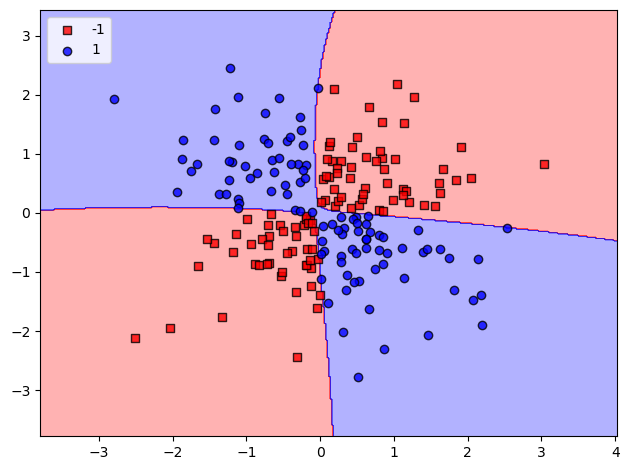

In [19]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=1000000.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor,classifier=svm,plot_object=plt,
 clases_names=name_clases_xor)
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_14.png', dpi=300)
plt.show()


##  SVM con datos iris

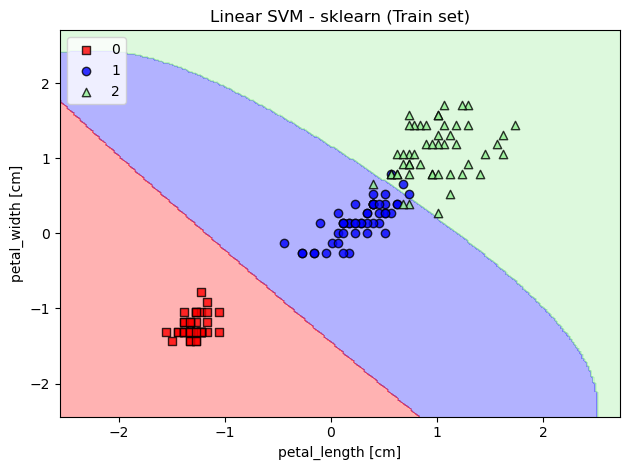

In [20]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined,classifier=svm,
                      plot_object=plt,test_idx=range(105, 150),
                      only_train=True,clases_names=name_clases)
plt.xlabel(f'{variable_names[0]} [cm]')
plt.ylabel(f'{variable_names[1]} [cm]')
plt.title('Linear SVM - sklearn (Train set)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

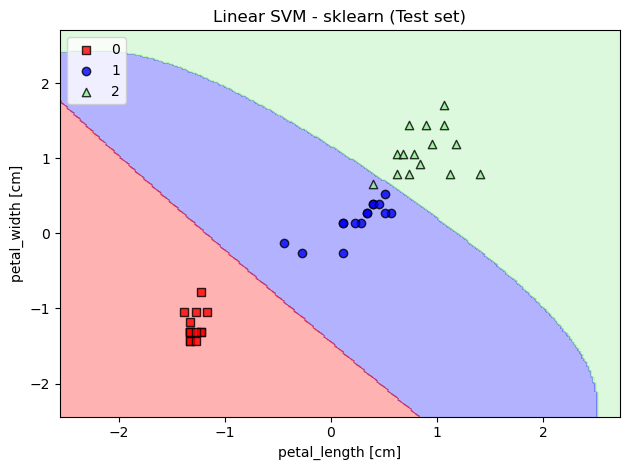

In [21]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined,classifier=svm,
                      plot_object=plt,test_idx=range(105, 150),
                      only_test=True,clases_names=name_clases)
plt.xlabel(f'{variable_names[0]} [cm]')
plt.ylabel(f'{variable_names[1]} [cm]')
plt.title('Linear SVM - sklearn (Test set)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


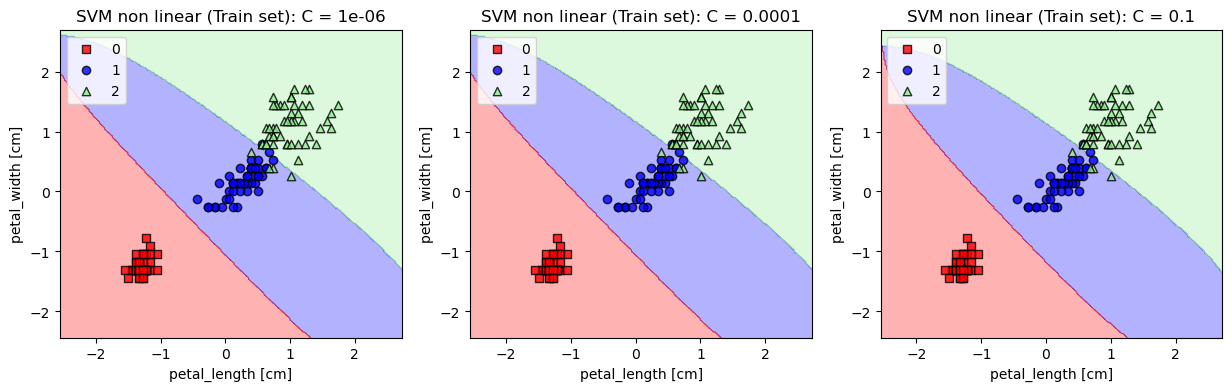

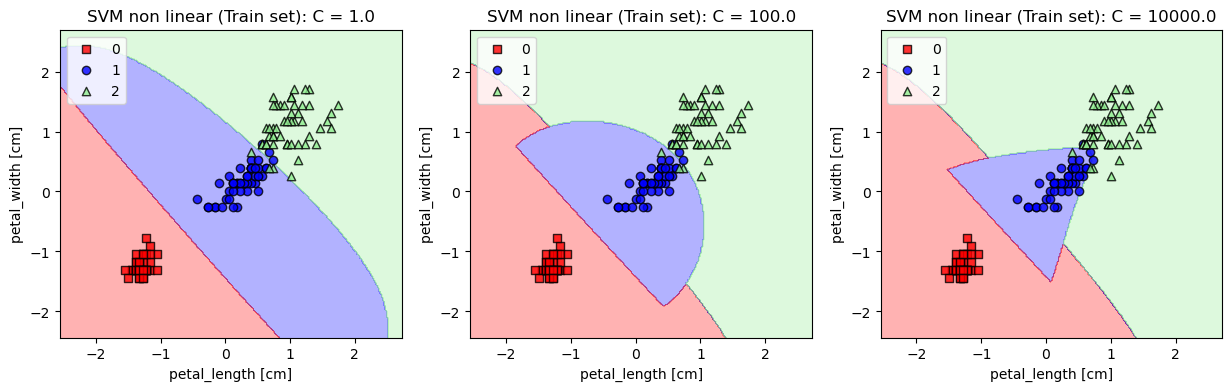

In [22]:
r_exponentes=[-6,-4,-1,0,2,4]
for idx, c in enumerate(r_exponentes):
    svm = SVC(kernel='rbf', gamma=0.2, C=10.**c, random_state=1)
    svm.fit(X_train_std, y_train)
    if idx%3==0:
        fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
    plot_decision_regions(X_combined_std, y_combined,classifier=svm,
                          plot_object=axs[idx%3],test_idx=range(105, 150),
                          only_train=True,clases_names=name_clases)
    axs[idx%3].set_xlabel(f'{variable_names[0]} [cm]')
    axs[idx%3].set_ylabel(f'{variable_names[1]} [cm]')
    axs[idx%3].set_title('SVM non linear (Train set): C = '+str(10.**c))
    axs[idx%3].legend(loc='upper left')
    if idx%3==2:
        plt.show()

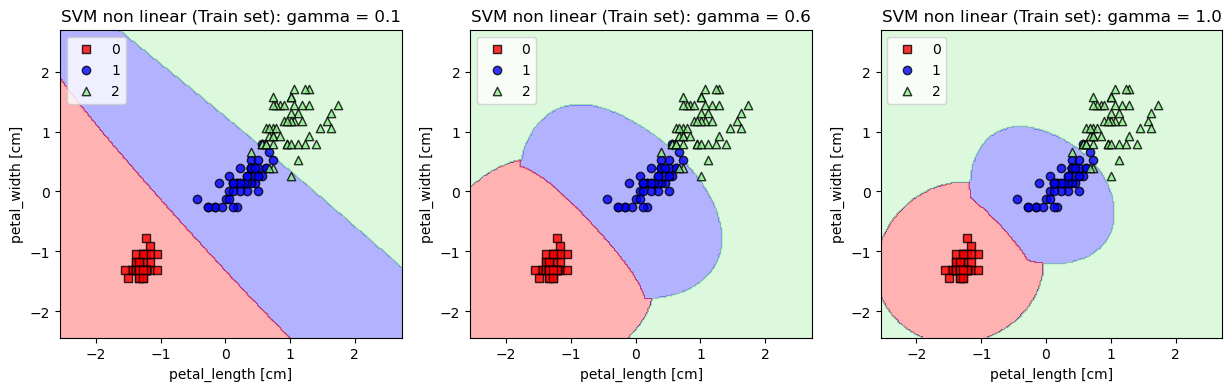

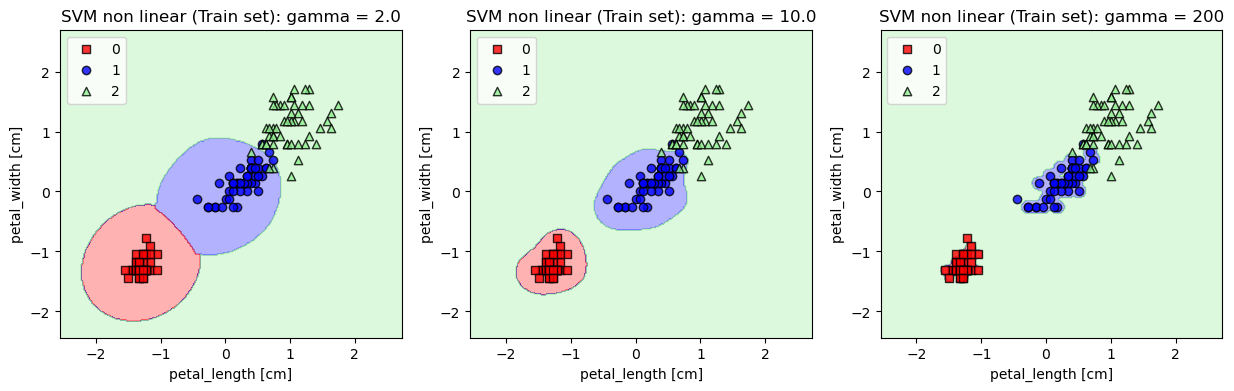

In [23]:
gamma_s=[0.1,0.6, 1.0, 2.0, 10.0,200]
for idx, c in enumerate(gamma_s):
    svm = SVC(kernel='rbf', gamma=c, C=1.0, random_state=1)
    svm.fit(X_train_std, y_train)
    if idx%3==0:
        fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
    plot_decision_regions(X_combined_std, y_combined,classifier=svm,
                          plot_object=axs[idx%3],test_idx=range(105, 150),
                          only_train=True,clases_names=name_clases)
    axs[idx%3].set_xlabel(f'{variable_names[0]} [cm]')
    axs[idx%3].set_ylabel(f'{variable_names[1]} [cm]')
    axs[idx%3].set_title('SVM non linear (Train set): gamma = '+str(c))
    axs[idx%3].legend(loc='upper left')
 
    if idx%3==2:
        plt.show()

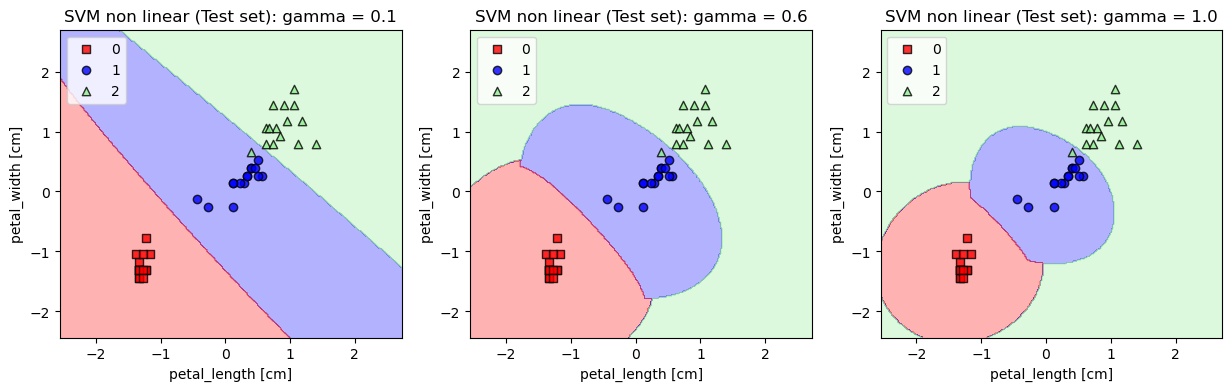

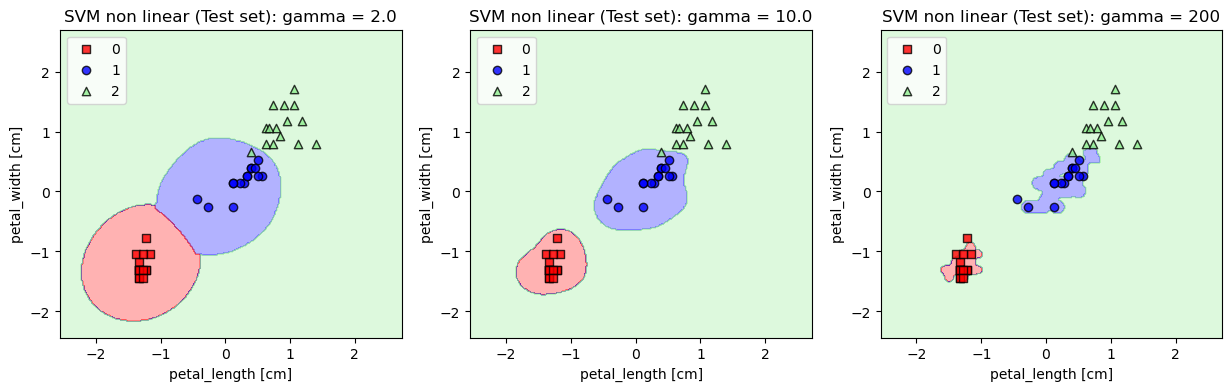

In [24]:
gamma_s=[0.1,0.6, 1.0, 2.0, 10.0,200]
for idx, c in enumerate(gamma_s):
    svm = SVC(kernel='rbf', gamma=c, C=1.0, random_state=1)
    svm.fit(X_train_std, y_train)
    if idx%3==0:
        fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
    plot_decision_regions(X_combined_std, y_combined,classifier=svm,
                          plot_object=axs[idx%3],test_idx=range(105, 150),
                          only_test=True,clases_names=name_clases)
    axs[idx%3].set_xlabel(f'{variable_names[0]} [cm]')
    axs[idx%3].set_ylabel(f'{variable_names[1]} [cm]')
    axs[idx%3].set_title('SVM non linear (Test set): gamma = '+str(c))
    axs[idx%3].legend(loc='upper left')
 
    if idx%3==2:
        plt.show()
